In [1]:
from retrievalAugmentedTransformer import RAT, Data_Processing

No sentence-transformers model found with name ProsusAI/finbert. Creating a new one with mean pooling.


In [2]:
dp = Data_Processing()
df = dp.get_data("AAPL", "2020-01-01", "2025-04-02")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  13 of 13 completed


In [3]:
print(df.shape)
df = dp.load_features("AAPL", df)
print(df.shape)

(1319, 22)
Features loaded from saved_features/AAPL
(1319, 8)


In [4]:
rat = RAT("AAPL", len(df.columns))
X, y = dp.format_data_combined(df, rat, 10, 5)

In [5]:
rat.query_articles("AAPL")

tensor([[ 0.1499,  0.1358,  0.0778,  ..., -0.2751,  0.0315,  0.0050],
        [ 0.0973,  0.0139,  0.2869,  ..., -0.5628,  0.0362,  0.0250],
        [ 0.0685,  0.0960,  0.2182,  ..., -0.1976, -0.0740,  0.0978],
        [ 0.0692,  0.2341,  0.1467,  ..., -0.2626, -0.0088,  0.0845],
        [ 0.1811, -0.0029,  0.4016,  ..., -0.5056,  0.1019, -0.0202]])

In [6]:
rat.load_model()

model loaded!


In [7]:
scale_preds, preds = rat.predict(X[-20:])

In [8]:
print(X[-20:].shape)
scale_preds.shape

torch.Size([20, 10, 8])


torch.Size([20, 5, 2])

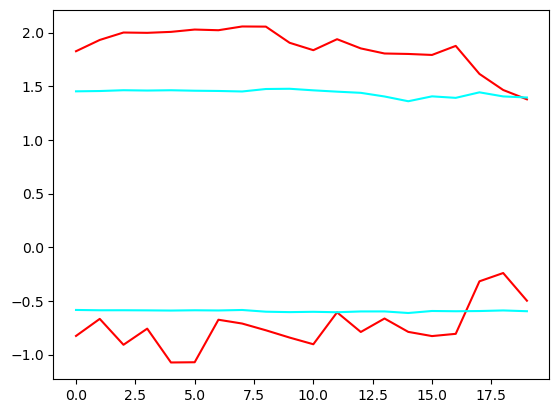

In [9]:
import matplotlib.pyplot as plt
plt.plot(X[-20:, 0, :2], color = "red")
plt.plot(scale_preds[:, 0], color = "cyan")

In [10]:
rat.save_model()

model saved!
